In [35]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()

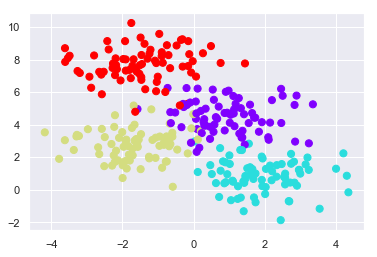

In [36]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers = 4,
                 random_state=0, cluster_std=1)
plt.scatter(X[:, 0],X[:, 1], c = y, s = 50, cmap='rainbow' )

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)


In [49]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    #Plot the training points
    ax.scatter(X[:, 0],X[:, 1], c = y, s = 30, cmap=cmap,
              clim = (y.min(), y.max()))
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    #Create a color plot
    n_classes = len(np.unique(y))
    contours  = ax.contourf(xx, yy, Z, alpha = 0.2,
                           levels  =np.arange(n_classes+1) - 0.5,
                           cmap=cmap, clim = (y.min(), y.max()))
    ax.set(xlim=xlim, ylim=ylim)
    
    

D:\Anaconda_3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


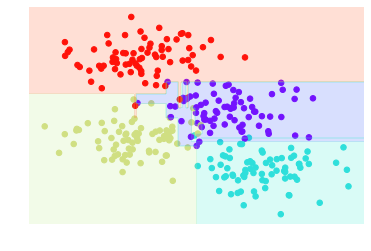

In [50]:
visualize_classifier(DecisionTreeClassifier(), X, y)

### Ensembles of Estimators: Random Forests

D:\Anaconda_3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


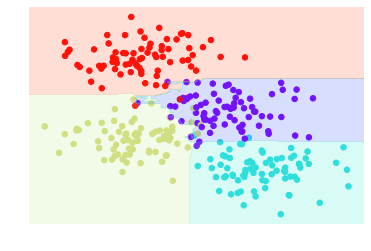

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=200, max_samples = 0.5, random_state=1)
#with the random subset from the data. 100 random decision trees

bag.fit(X, y)
visualize_classifier(bag, X, y)

D:\Anaconda_3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


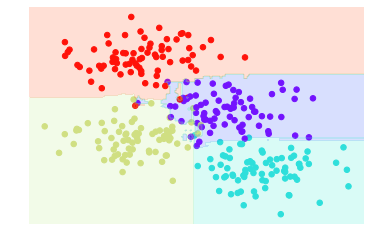

In [59]:
from  sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

D:\Anaconda_3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


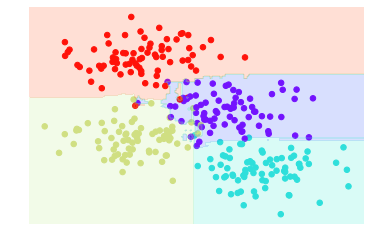

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

### Random Forest Regression

<ErrorbarContainer object of 3 artists>

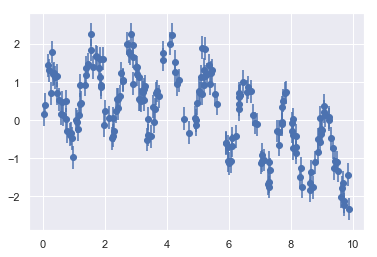

In [79]:
rng = np.random.RandomState(42)
x = 10*rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    return fast_oscillation + slow_oscillation + noise
y = model(x)
plt.errorbar(x, y,0.3, fmt='o')

D:\Anaconda_3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


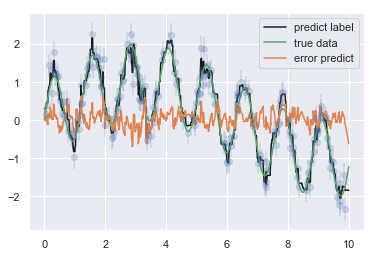

In [105]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, np.newaxis])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y,0.3, fmt='o', alpha = 0.2)
plt.plot(xfit, yfit, '-k', label='predict label')
plt.plot(xfit, ytrue, '-g', label='true data')
plt.plot(xfit,yfit-ytrue, label='error predict')
plt.legend()


### Random Forest for Classifying Digits

In [108]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

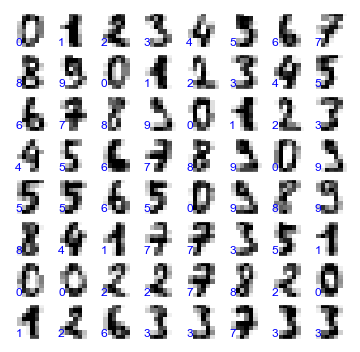

In [127]:
#set the figure
fig = plt.figure(figsize=(6,6))

for i in range(64):
    ax = fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest')
    
    ax.text(0,7, str(digits.target[i]), color='blue',fontsize =12)
    

In [131]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                               random_state=0)
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Text(80.90000000000006, 0.5, 'predict label')

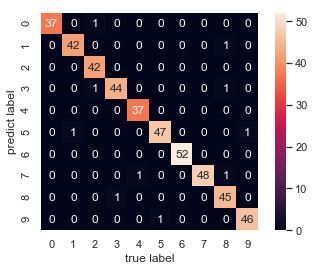

In [142]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)

sns.heatmap(mat.T, xticklabels=True, annot = True, square= True)
plt.xlabel('true label')
plt.ylabel('predict label')

In [137]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

